In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json('tsla.json')

In [12]:
def calc_corr(df, col1, col2):
    print(col1, 'vs', col2, ':')
corroutliers = df[col1].corr(df[col2])
print('Correlation w/ Outliers:', corroutliers)
q1=df[[col1, col2]].quantile(0.25)
q3=df[[col1, col2]].quantile(0.75)
iqr=q3-q1
lowbound=q1-1.5*iqr
upperbound=q1+1.5*iqr
dfnooutliers = df.copy()
idx=0
for idx in range (len(dfnooutliers)):
    value1=dfnooutliers.loc[idx][col1]
    value2=dfnooutliers.loc[idx][col2]
    if value1>upperbound[col1] or value1<lowbound[col1]:
        dfnooutliers.drop([idx], inplace=True)
    if value2>upperbound[col2] or value2<lowbound[col2]:
        dfnooutliers.drop([idx], inplace=True)
correlationwithoutoutliers=dfnooutliers[col1].corr(dfnooutliers[col2])
print('Correlation without outliers: ', correlationwithoutoutliers)

<AxesSubplot:xlabel='open', ylabel='volume'>

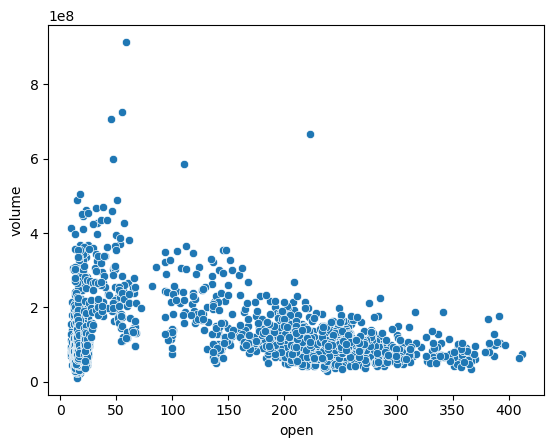

In [17]:
sns.scatterplot(data=df, x='open', y='volume')

In [19]:
df['open'].corr(df['volume'])

-0.048496276906608585